In [137]:
import pandas as pd
import numpy as np

In [138]:
advt = pd.read_csv("C:\\Users\\hp\\Desktop\\Data Science\\ML\\Linear Regression\\Linear regression class files\\Advertising.csv")
advt = advt[["TV", "Radio", "Newspaper", "Sales"]]
#advt=pd.read_csv("C:/Users/hp/Desktop/Data Science/ML/Linear Regression/Linear regression class files/Advertising.csv")

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics

In [23]:
import seaborn as sns

In [57]:
import pandas_profiling

In [60]:
pandas_profiling.ProfileReport(advt)

Number of variables,4
Number of observations,200
Total Missing (%),0.0%
Total size in memory,6.3 KiB
Average record size in memory,32.0 B
Numeric,4
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [109]:
advt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null object
Sales        200 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.3+ KB


In [142]:
#HANDLING OUTLIERS
advt['Sales']= advt['Sales'].clip_upper(advt['Sales'].quantile(0.99))
advt['Sales']= advt['Sales'].clip_lower(advt['Sales'].quantile(0.01))

advt['TV']=advt['TV'].clip_upper(advt['TV'].quantile(0.99))
advt['TV']=advt['TV'].clip_lower(advt['TV'].quantile(0.01))
advt['Radio']=advt['Radio'].clip_upper(advt['Radio'].quantile(0.99))
advt['Radio']=advt['Radio'].clip_lower(advt['Radio'].quantile(0.01))


In [145]:
#HADLING MISSING VALUES

advt['TV']=advt['TV'].fillna(advt['TV'].mean)
advt['Radio']=advt['Radio'].fillna(advt['Radio'].mean)
advt['Newspaper']=advt['Newspaper'].fillna(advt['Newspaper'].mean)

C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated,

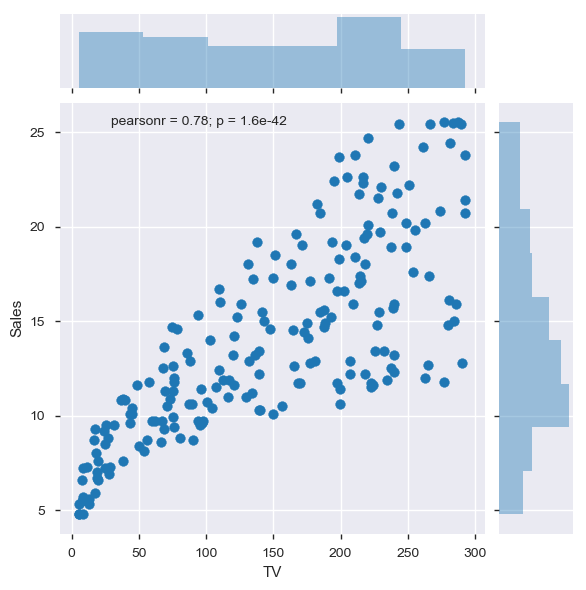

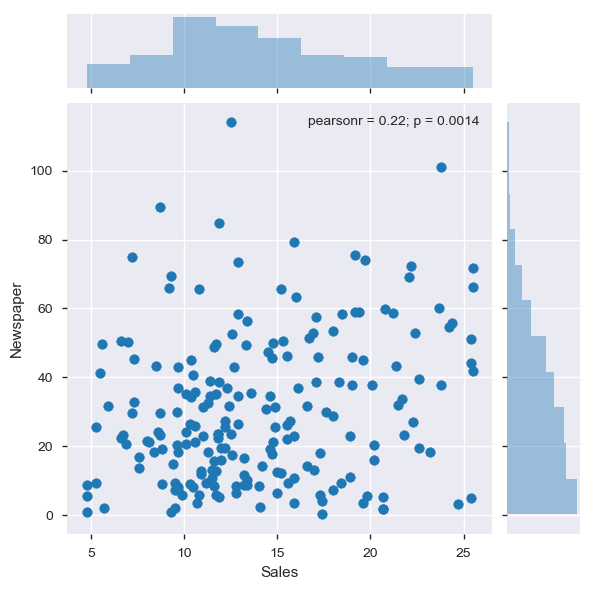

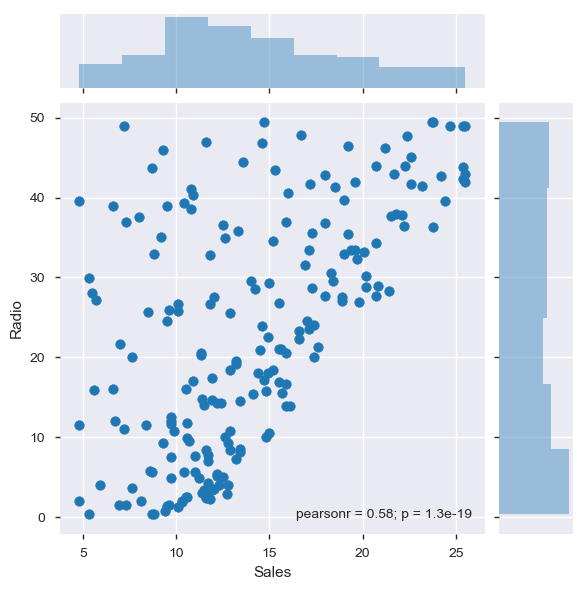

In [149]:
#CHECK 1ST PROPERTY OF LINEAR REGRESSION
sns.jointplot(advt.TV, advt.Sales)
sns.jointplot(advt.Sales, advt.Newspaper)
sns.jointplot(advt.Sales, advt.Radio)

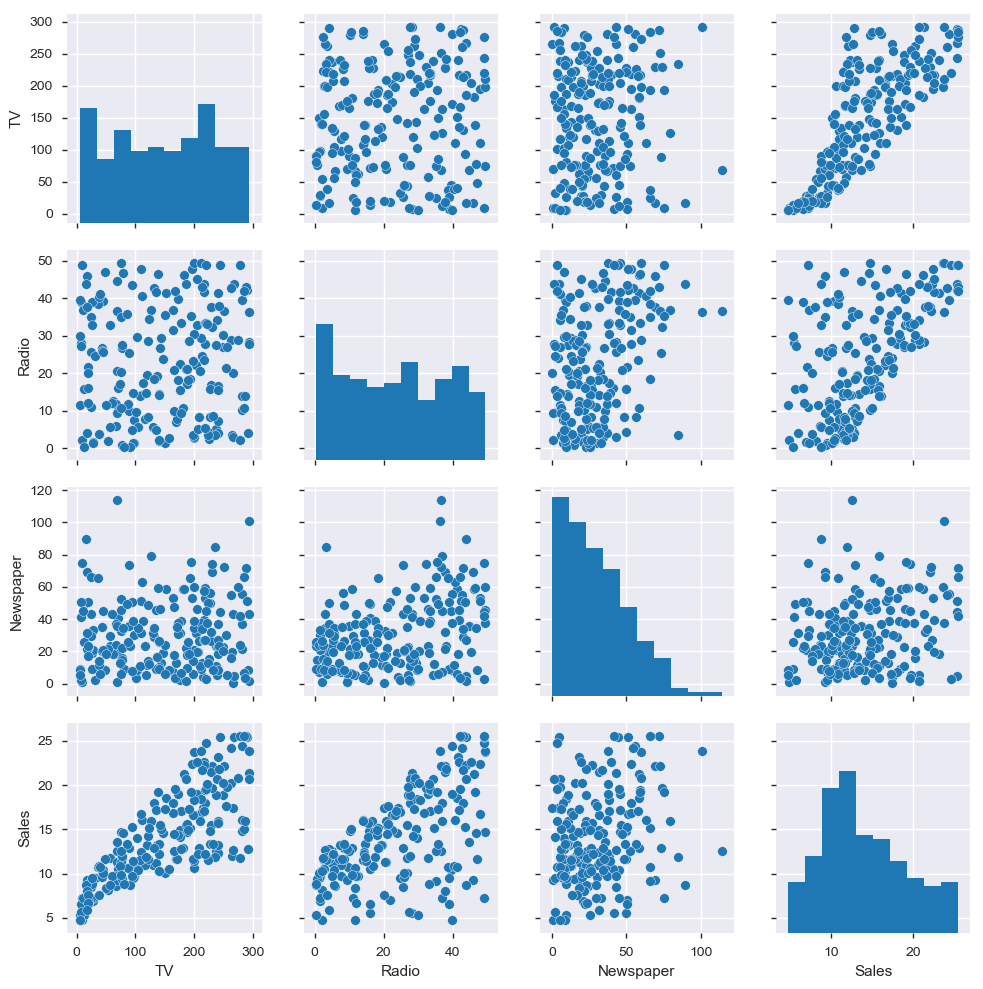

In [147]:
#CHECK 3RD PROPERTY OF LINEAR REGRESSION
# 1ST METHOD TO CHECK COREELATION
sns.pairplot( advt )

In [86]:
# 2ND METHOD TO CHECK COREELATION
advt.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


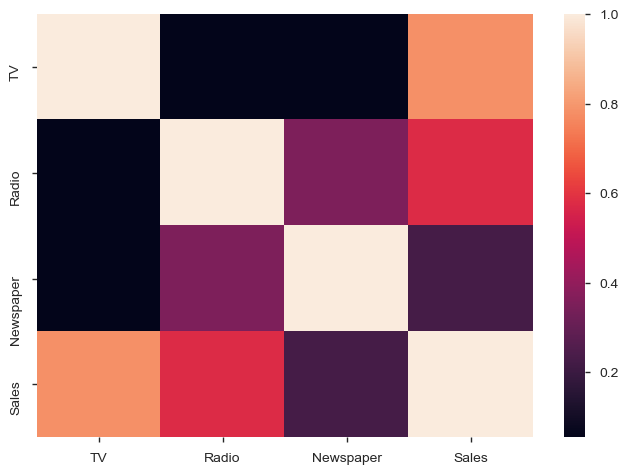

In [87]:
# 3RD METHOD TO CHECK COREELATION
sns.heatmap( advt.corr() )

In [34]:
#Splitting the data
X_train, X_test, y_train, y_test=train_test_split(advt[["TV", "Radio", "Newspaper"]], advt.Sales, test_size=0.3 )

In [38]:
print len(X_train)
print len(X_test)

140
60


In [45]:
# Creating linear model
linreg=LinearRegression()
linreg.fit(X_train, y_train)
y_pred=linreg.predict(X_test)

In [150]:
#check the accuracy of the model
rmse=np.sqrt(metrics.mean_squared_error(y_test , y_pred))
rmse

2.0984071439107312

In [151]:
metrics.r2_score(y_test , y_pred)

0.8565197201250948

C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


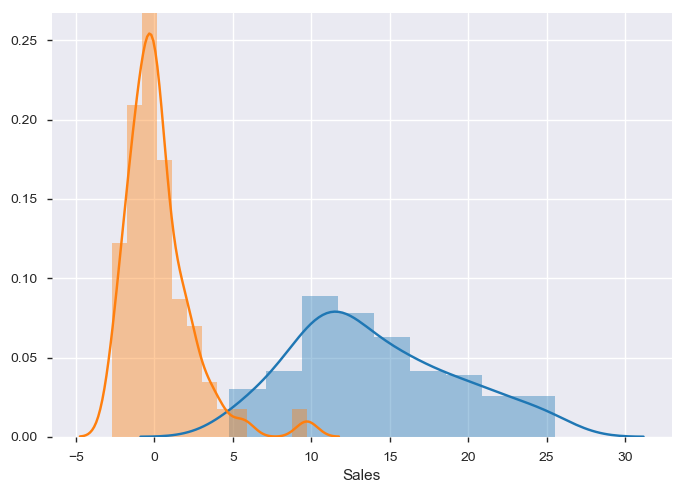

In [152]:
#CHECK 2ST PROPERTY OF LINEAR REGRESSION
# 1ST METHOD - HISTOGRAM
residual=y_pred-y_test
sns.distplot(advt.Sales)
sns.distplot(residual)

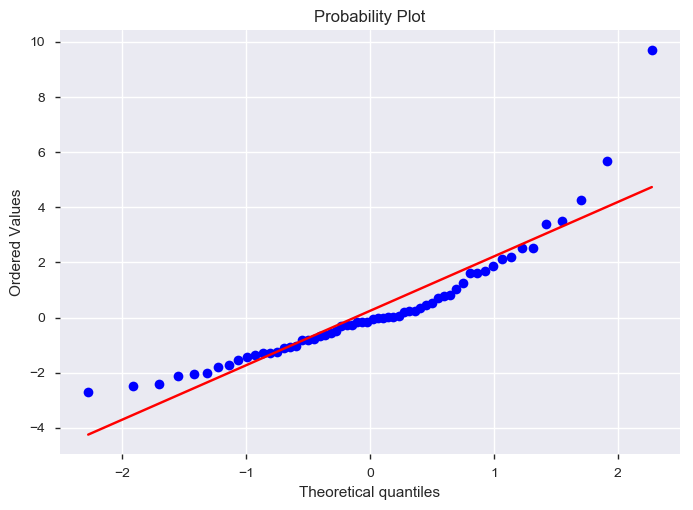

In [78]:
#2ND METHOD Q-Q PLOT
from scipy import stats
import pylab

stats.probplot( residual, dist="norm", plot=pylab )
pylab.show()


C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hp\AppData\Local\Continuum\anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


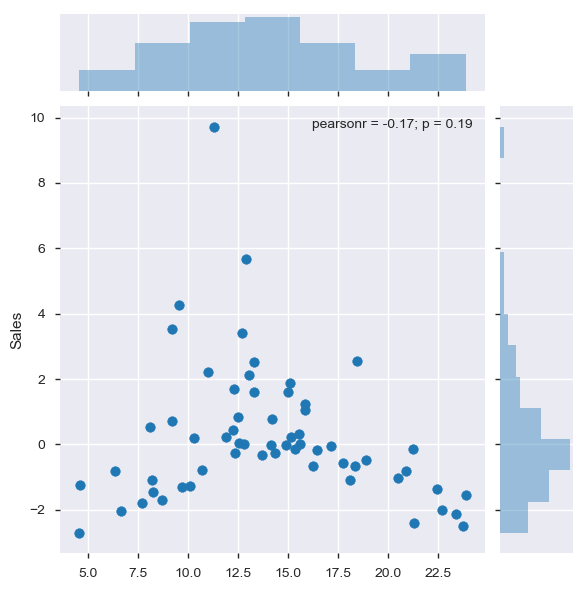

In [89]:
#CHECK 4th PROPERTY OF LINEAR REGRESSION

sns.jointplot(y_pred, residual)

In [153]:
linreg.coef_

array([ 0.04294402,  0.20164588, -0.00986675])